# Agglomerative Clustering

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [40]:
iris_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df)

### Apply the PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

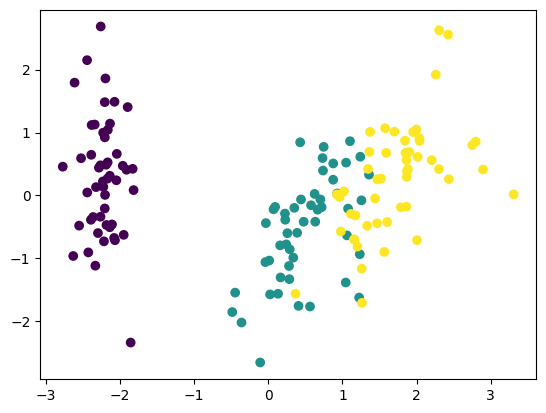

In [43]:
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=dataset.target)

### Dendrogram

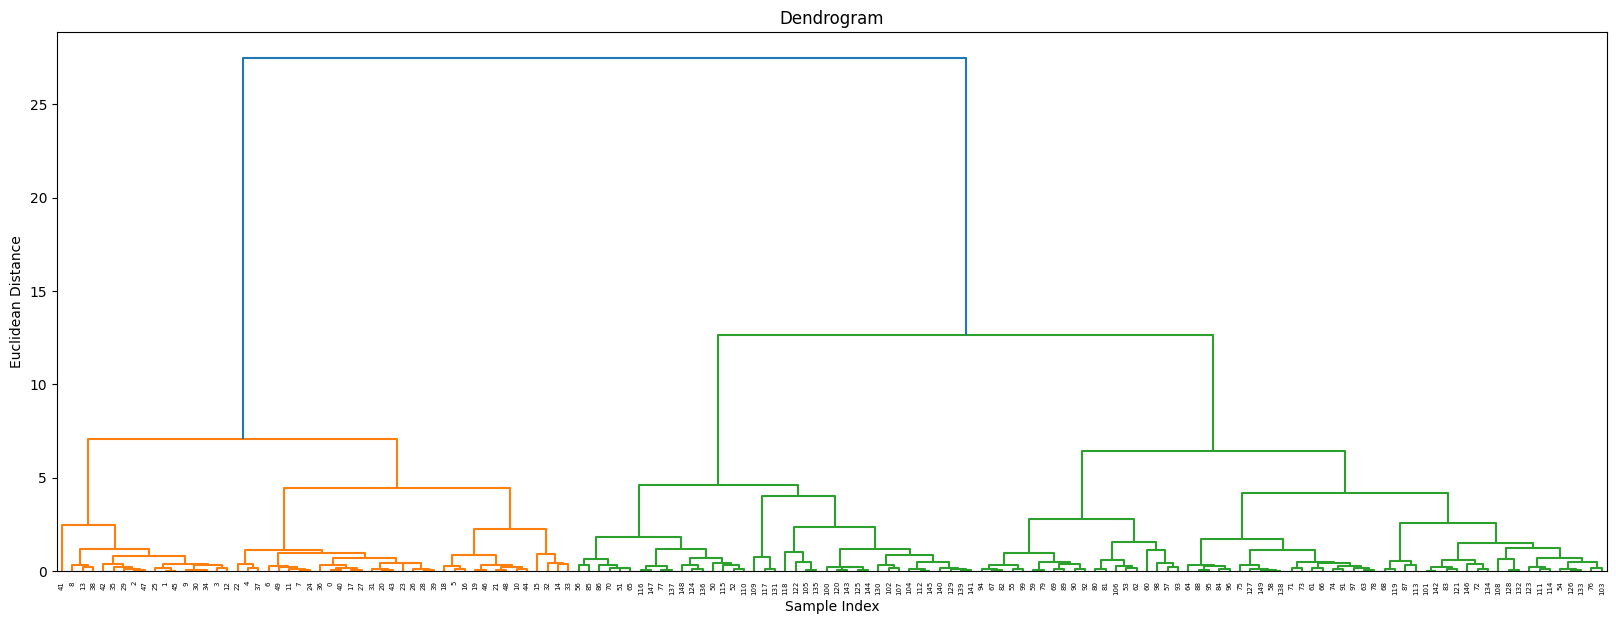

In [44]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(X_scaled_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()

### Agglomerative Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
X_class = cluster.fit_predict(X_scaled_pca)

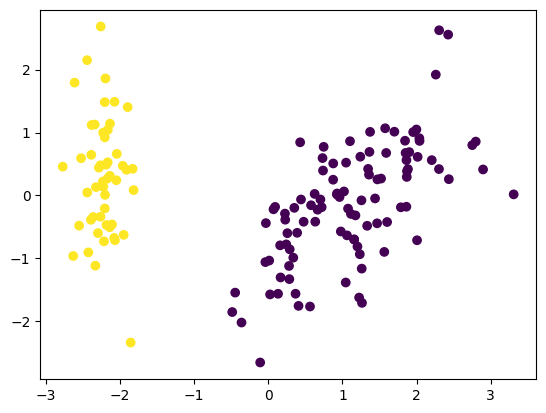

In [ ]:
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=X_class)